# Problem


To understand the patterns of giving credit to users.


Which features or attributes is important to give credit (loan)

# Understand the data
Age (numeric)

Sex (text: male, female)

Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

Housing (text: own, rent, or free)

Saving accounts (text - little, moderate, quite rich, rich)

Checking account (numeric, in DM - Deutsch Mark)

Credit amount (numeric, in DM)

Duration (numeric, in month)

Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

In [2]:
#importing neccessarily libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load the german_dataset csv file into german_data variable
german_data = pd.read_csv("german_credit_data.csv")

In [4]:
#check the top 5 records in my german_dataset
german_data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [5]:
german_data.shape

(1000, 11)

In [6]:
#data cleaning
#checking if there are missing data
german_data.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [7]:
#check the info
german_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [8]:
german_data['Checking account'].value_counts()

Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64

In [9]:
#filling with the mode
german_data['Checking account'] = german_data['Checking account'].fillna(german_data['Checking account'].mode()[0])

In [10]:
german_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  1000 non-null   object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [11]:
german_data.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account      0
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [12]:
german_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  1000 non-null   object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [13]:
#filling with the mode
german_data['Saving accounts'] = german_data['Saving accounts'].fillna(german_data['Saving accounts'].mode()[0])

In [14]:
german_data.isnull().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [15]:
german_data.drop('Unnamed: 0', axis='columns', inplace=True)

In [16]:
german_data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [17]:
#checking if all the columns has the right data type
german_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [18]:
german_data['Job'].value_counts()

Job
2    630
1    200
3    148
0     22
Name: count, dtype: int64

0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled

In [19]:
german_data['Job'] = german_data['Job'].map({0: 'unskilled and non-resident',
                                             1: 'unskilled and resident',
                                             2: 'skilled',
                                             3: 'highly skilled'})

In [20]:
german_data['Job'].value_counts()

Job
skilled                       630
unskilled and resident        200
highly skilled                148
unskilled and non-resident     22
Name: count, dtype: int64

In [21]:
german_data['Job'] = german_data['Job'].apply(str)

In [22]:
german_data['Job'].value_counts()

Job
skilled                       630
unskilled and resident        200
highly skilled                148
unskilled and non-resident     22
Name: count, dtype: int64

In [23]:
german_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   object
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(3), object(7)
memory usage: 78.3+ KB


<Axes: xlabel='Age', ylabel='Count'>

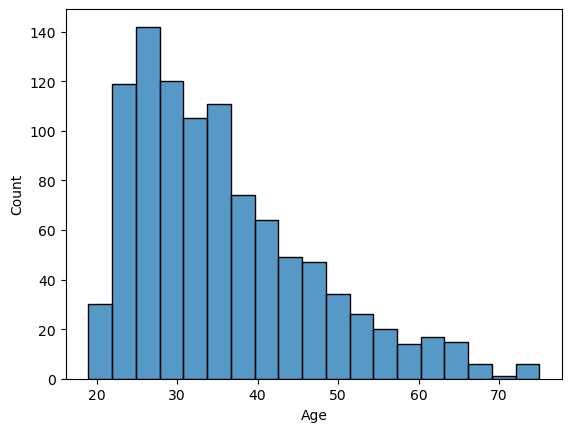

In [57]:
sns.histplot(data=german_data, x="Age")

The highest credit loan users from the dataset are within their primes, agile and industrious young (between 25-40)people because they possibly need more resources and support, while the older ones are minimal.

c:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


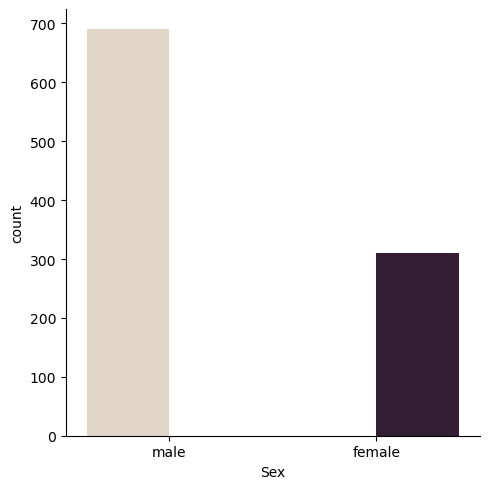

In [58]:
sns.catplot(x="Sex", kind="count", palette="ch:.25", hue='Sex', data=german_data)

We have about 700 males appyling for credit loan with about 300 females, Males tends to take more risk, and has more financial needs or responsiblities compare to female.

c:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


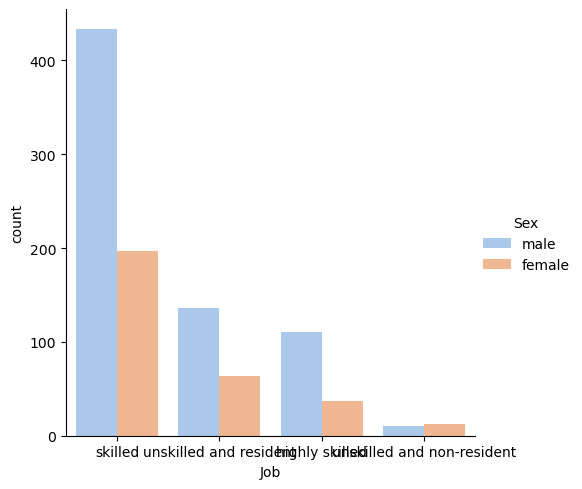

In [59]:
sns.catplot(x="Job", kind="count", palette="pastel", hue='Sex', data=german_data)

Across the different Job categories, there are more Males over female, this is also show that there are more males applying for loan or credit in the company.

In [60]:
german_data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

<Axes: xlabel='count', ylabel='Housing'>

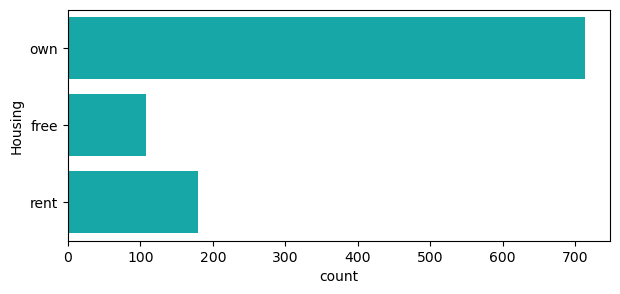

In [61]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="Housing", data=german_data, color="c")

About 700 loan borrowers, owns a house, about 200 rents an apartment, while about 100 stays in a free apartment ehich might mean that there are dependant on either parent or gudiance.

c:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


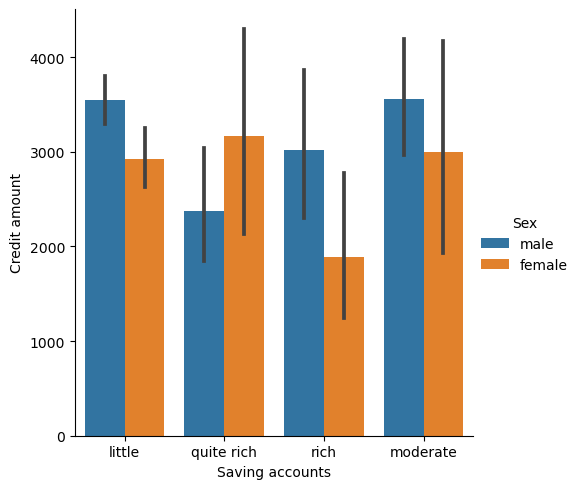

In [62]:
sns.catplot(x="Saving accounts", y="Credit amount", hue="Sex",
            kind="bar", data=german_data)

C:\Users\USER\AppData\Local\Temp\ipykernel_6116\2019203807.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(german_data['Credit amount'],bins=100,kde=False)


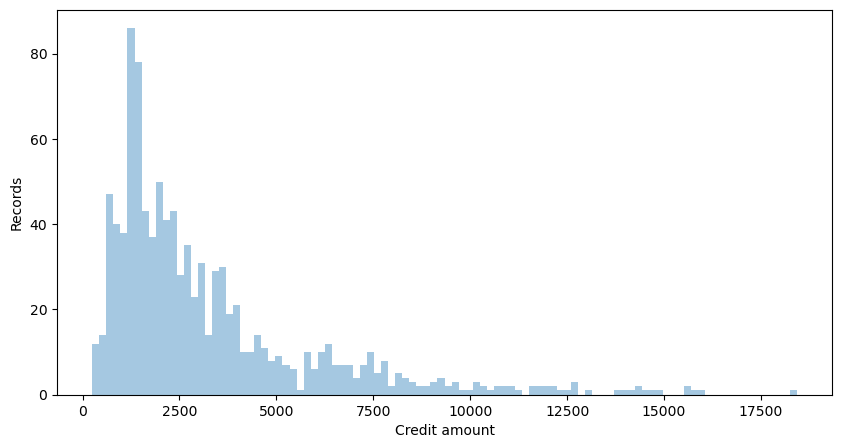

In [63]:
plt.figure(figsize=(10,5))
plt.xlabel('Credit Amount')
plt.ylabel('Records')
sns.distplot(german_data['Credit amount'],bins=100,kde=False)
plt.show()

In [64]:
german_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   object
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(3), object(7)
memory usage: 78.3+ KB


<Axes: xlabel='Duration', ylabel='Count'>

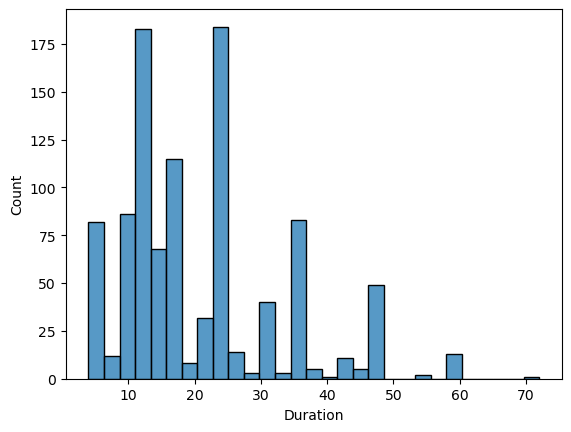

In [65]:
sns.histplot(data=german_data, x="Duration")

In [66]:
german_data.describe()

,Age,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000
mean,35.546000,3271.258000,20.903000
std,11.375469,2822.736876,12.058814
min,19.000000,250.000000,4.000000
25%,27.000000,1365.500000,12.000000
50%,33.000000,2319.500000,18.000000
75%,42.000000,3972.250000,24.000000
max,75.000000,18424.000000,72.000000


In [67]:
german_data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [68]:
german_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   object
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(3), object(7)
memory usage: 78.3+ KB


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler


In [25]:
# Encoding categorical variables
label_encoders = {}
for column in german_data.select_dtypes(include=['object']).columns:
    if column != 'Risk':  # Skip the target column
        label_encoders[column] = LabelEncoder()
        german_data[column] = label_encoders[column].fit_transform(german_data[column])

In [26]:
# Encode the target variable
label_encoders['Risk'] = LabelEncoder()
german_data['Risk'] = label_encoders['Risk'].fit_transform(german_data['Risk'])

In [27]:
# Define features and target
X = german_data.drop('Risk', axis=1)
y = german_data['Risk']

In [28]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [29]:
# Display class distribution
print(y_train.value_counts(normalize=True))

Risk
1    0.7
0    0.3
Name: proportion, dtype: float64


In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Define a function to evaluate models
def evaluate_model(model):
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f'CV Accuracy: {cv_scores.mean()}')

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
evaluate_model(dt)

# Random Forest
rf = RandomForestClassifier(random_state=42)
evaluate_model(rf)

# Support Vector Machine
svc = SVC(random_state=42)
evaluate_model(svc)

CV Accuracy: 0.6471428571428571
CV Accuracy: 0.6885714285714286
CV Accuracy: 0.7042857142857143


In [77]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for RandomForest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Grid Search for RandomForest
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print(f'Best parameters for RandomForest: {grid_rf.best_params_}')
print(f'Best CV Accuracy: {grid_rf.best_score_}')

# Train the best model
best_rf = grid_rf.best_estimator_
best_rf.fit(X_train, y_train)

Best parameters for RandomForest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best CV Accuracy: 0.7128571428571429


RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=200,
                       random_state=42)

In [30]:
# Define parameter grids for each model
param_grid = [
    {
        'classifier': [DecisionTreeClassifier()],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10]
    },
    {
        'classifier': [RandomForestClassifier(random_state=42)],
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10]
    },
    {
        'classifier': [SVC(random_state=42)],
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    }
]

# Define a pipeline
pipe = Pipeline([('classifier', DecisionTreeClassifier())])

# Perform grid search
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and best score for each classifier
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best CV Accuracy: {grid_search.best_score_}')

# Train the best model
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predictions
y_pred = best_model.predict(X_test)




KeyboardInterrupt: 

              precision    recall  f1-score   support

         bad       0.57      0.22      0.32        90
        good       0.74      0.93      0.82       210

    accuracy                           0.72       300
   macro avg       0.65      0.58      0.57       300
weighted avg       0.69      0.72      0.67       300



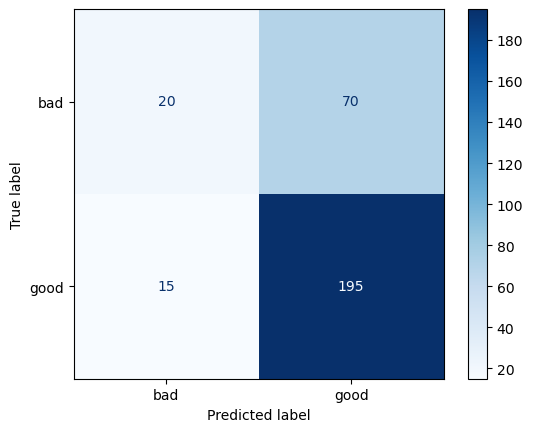

In [79]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Classification Report
print(classification_report(y_test, y_pred, target_names=label_encoders['Risk'].classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoders['Risk'].classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [80]:
# Define parameter grids for each model
param_grid = [
    {
        'classifier': [DecisionTreeClassifier()],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10]
    },
    {
        'classifier': [RandomForestClassifier(random_state=42)],
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10]
    },
    {
        'classifier': [SVC(random_state=42)],
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    }
]

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

         bad       0.57      0.22      0.32        90
        good       0.74      0.93      0.82       210

    accuracy                           0.72       300
   macro avg       0.65      0.58      0.57       300
weighted avg       0.69      0.72      0.67       300



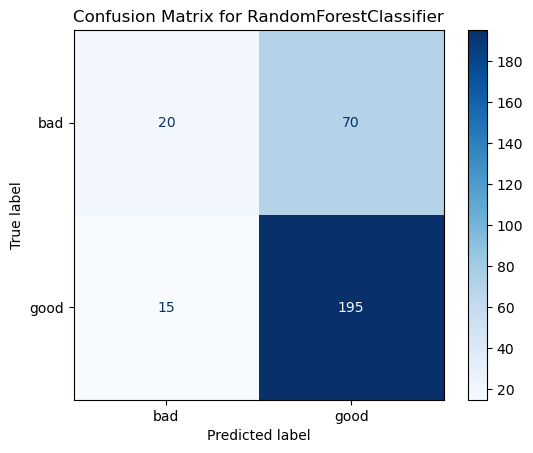

                    Model  Accuracy
0  RandomForestClassifier  0.716667


In [31]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Define parameter grids for each model
param_grid = [
    {
        'classifier': [DecisionTreeClassifier()],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10]
    },
    {
        'classifier': [RandomForestClassifier(random_state=42)],
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10]
    },
    {
        'classifier': [SVC(random_state=42)],
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    }
]

# Define a pipeline
pipe = Pipeline([('classifier', DecisionTreeClassifier())])

# Perform grid search
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Extract the best parameters for each classifier
best_params = {
    'DecisionTreeClassifier': {},
    'RandomForestClassifier': {},
    'SVC': {}
}

for i, model_params in enumerate(grid_search.cv_results_['params']):
    model_name = type(model_params['classifier']).__name__
    if grid_search.cv_results_['rank_test_score'][i] == 1:
        best_params[model_name] = model_params

# Create a dataframe to store the accuracy of each model
accuracy_df = pd.DataFrame(columns=['Model', 'Accuracy'])

# Evaluate each best model
for model_name, params in best_params.items():
    if params:
        model = params['classifier']
        model.set_params(**{k.replace('classifier__', ''): v for k, v in params.items() if k != 'classifier'})
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Add model accuracy to dataframe
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_df = pd.concat([accuracy_df, pd.DataFrame({'Model': [model_name], 'Accuracy': [accuracy]})], ignore_index=True)
        
        # Print classification report and confusion matrix
        print(f'Classification Report for {model_name}:')
        print(classification_report(y_test, y_pred, target_names=label_encoders['Risk'].classes_))
        
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoders['Risk'].classes_)
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix for {model_name}')
        plt.show()

# Display the accuracy dataframe
print(accuracy_df)

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.52      0.20      0.29        59
           1       0.73      0.92      0.82       141

    accuracy                           0.71       200
   macro avg       0.63      0.56      0.56       200
weighted avg       0.67      0.71      0.66       200



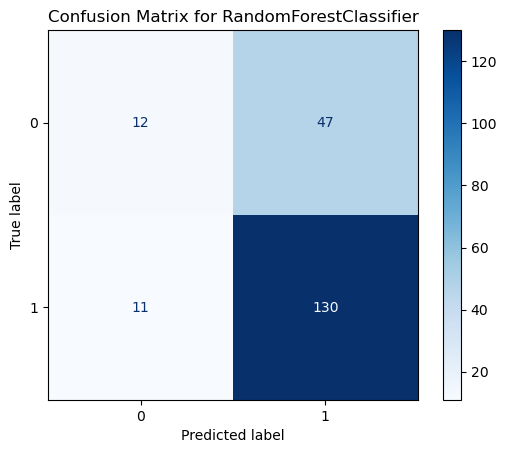

                    Model  Accuracy
0  RandomForestClassifier      0.71


In [32]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Assume X and y are defined elsewhere in your script
# X = ...
# y = ...

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grids for each model
param_grid = [
    {
        'classifier': [DecisionTreeClassifier()],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10]
    },
    {
        'classifier': [RandomForestClassifier(random_state=42)],
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10]
    },
    {
        'classifier': [SVC(random_state=42)],
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    }
]

# Define a pipeline
pipe = Pipeline([('classifier', DecisionTreeClassifier())])

# Perform grid search
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Extract the best parameters for each classifier
best_params = {
    'DecisionTreeClassifier': {},
    'RandomForestClassifier': {},
    'SVC': {}
}

for i, model_params in enumerate(grid_search.cv_results_['params']):
    model_name = type(model_params['classifier']).__name__
    if grid_search.cv_results_['rank_test_score'][i] == 1:
        best_params[model_name] = model_params

# Create a dataframe to store the accuracy of each model
accuracy_df = pd.DataFrame(columns=['Model', 'Accuracy'])

# Evaluate each best model
for model_name, params in best_params.items():
    if params:
        model = params['classifier']
        model.set_params(**{k.replace('classifier__', ''): v for k, v in params.items() if k != 'classifier'})
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Add model accuracy to dataframe
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_df = pd.concat([accuracy_df, pd.DataFrame({'Model': [model_name], 'Accuracy': [accuracy]})], ignore_index=True)
        
        # Print classification report and confusion matrix
        print(f'Classification Report for {model_name}:')
        print(classification_report(y_test, y_pred))
        
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix for {model_name}')
        plt.show()

# Display the accuracy dataframe
print(accuracy_df)

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.52      0.20      0.29        59
           1       0.73      0.92      0.82       141

    accuracy                           0.71       200
   macro avg       0.63      0.56      0.56       200
weighted avg       0.67      0.71      0.66       200



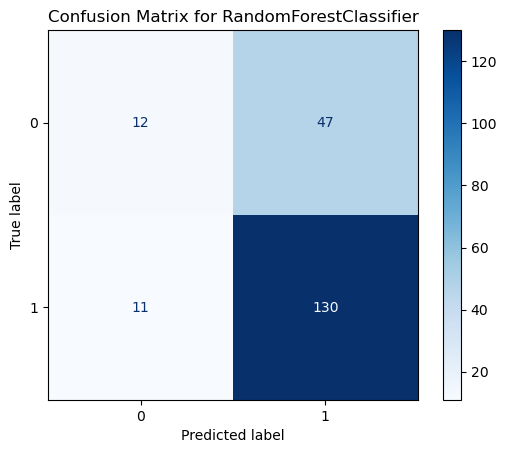

                    Model  Accuracy
0  RandomForestClassifier      0.71


In [33]:
# Define parameter grids for each model
param_grid = [
    {
        'classifier': [DecisionTreeClassifier()],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10]
    },
    {
        'classifier': [RandomForestClassifier(random_state=42)],
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10]
    },
    {
        'classifier': [SVC(random_state=42)],
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    }
]

# Define a pipeline
pipe = Pipeline([('classifier', DecisionTreeClassifier())])

# Perform grid search
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Extract the best parameters for each classifier
best_params = {
    'DecisionTreeClassifier': None,
    'RandomForestClassifier': None,
    'SVC': None
}

for i, model_params in enumerate(grid_search.cv_results_['params']):
    model_name = type(model_params['classifier']).__name__
    if grid_search.cv_results_['rank_test_score'][i] == 1:
        best_params[model_name] = model_params

# Create a dataframe to store the accuracy of each model
accuracy_df = pd.DataFrame(columns=['Model', 'Accuracy'])

# Evaluate each best model
for model_name, params in best_params.items():
    if params:
        model = params['classifier']
        model.set_params(**{k.replace('classifier__', ''): v for k, v in params.items() if k != 'classifier'})
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Add model accuracy to dataframe
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_df = pd.concat([accuracy_df, pd.DataFrame({'Model': [model_name], 'Accuracy': [accuracy]})], ignore_index=True)
        
        # Print classification report and confusion matrix
        print(f'Classification Report for {model_name}:')
        print(classification_report(y_test, y_pred))
        
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix for {model_name}')
        plt.show()

# Display the accuracy dataframe
print(accuracy_df)


Evaluating RandomForest...

Results for RandomForest:
Train Accuracy: 0.93625
Test Accuracy: 0.71
Confusion Matrix:
[[  9  50]
 [  8 133]]
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.15      0.24        59
           1       0.73      0.94      0.82       141

    accuracy                           0.71       200
   macro avg       0.63      0.55      0.53       200
weighted avg       0.67      0.71      0.65       200



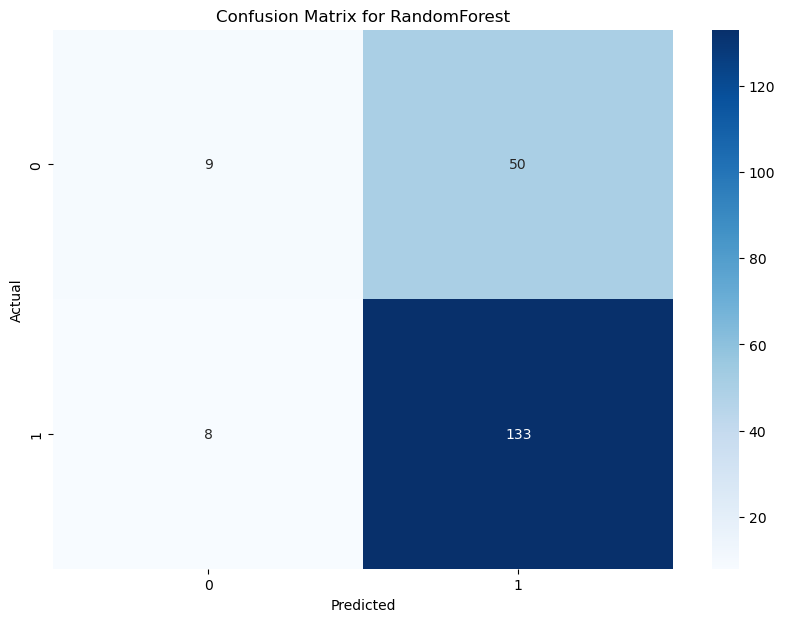


Evaluating DecisionTree...

Results for DecisionTree:
Train Accuracy: 0.89875
Test Accuracy: 0.62
Confusion Matrix:
[[ 21  38]
 [ 38 103]]
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.36      0.36        59
           1       0.73      0.73      0.73       141

    accuracy                           0.62       200
   macro avg       0.54      0.54      0.54       200
weighted avg       0.62      0.62      0.62       200



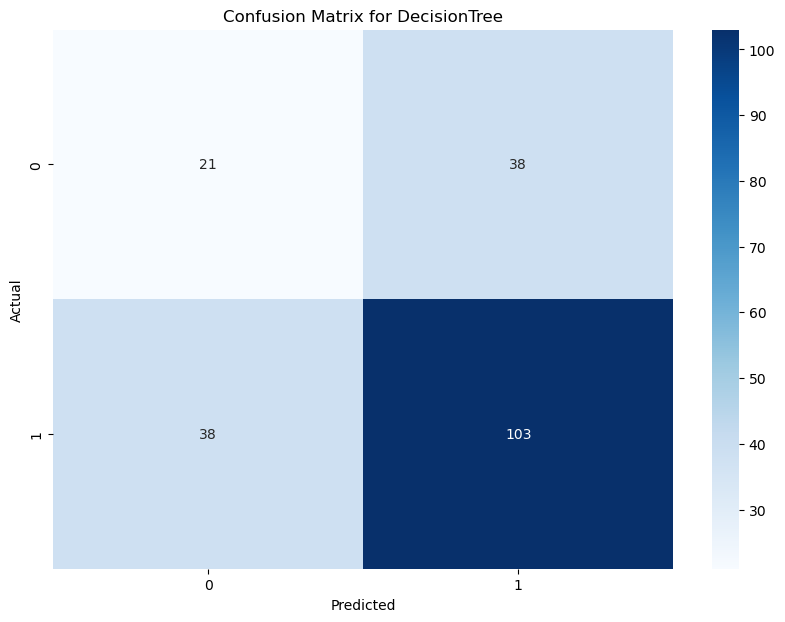


Evaluating SVM...


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Results for SVM:
Train Accuracy: 0.69875
Test Accuracy: 0.705
Confusion Matrix:
[[  0  59]
 [  0 141]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.70      1.00      0.83       141

    accuracy                           0.70       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.50      0.70      0.58       200



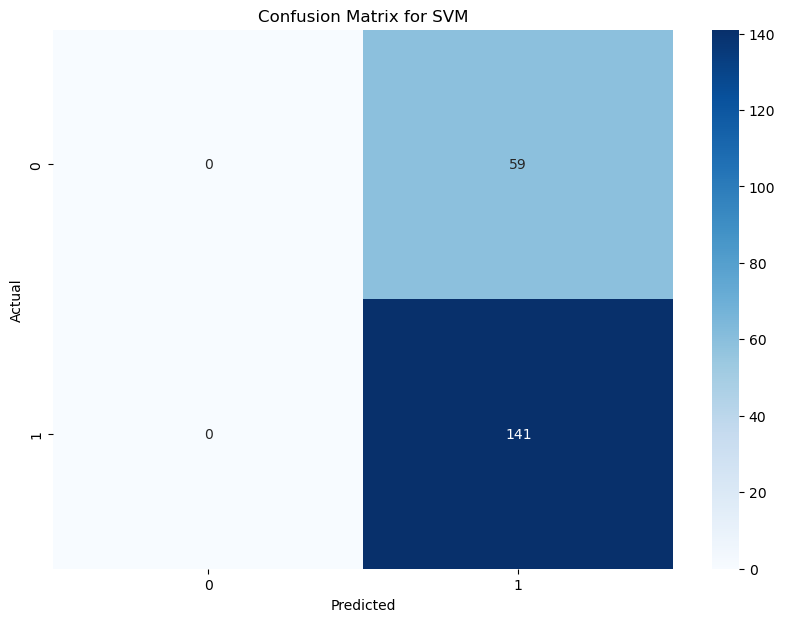


Evaluating XGBoost...


c:\Users\USER\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:15:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\USER\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:15:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\USER\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:15:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\USER\anaconda3\Lib\site-packages\xgbo


Results for XGBoost:
Train Accuracy: 0.82125
Test Accuracy: 0.715
Confusion Matrix:
[[ 12  47]
 [ 10 131]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.20      0.30        59
           1       0.74      0.93      0.82       141

    accuracy                           0.71       200
   macro avg       0.64      0.57      0.56       200
weighted avg       0.68      0.71      0.67       200



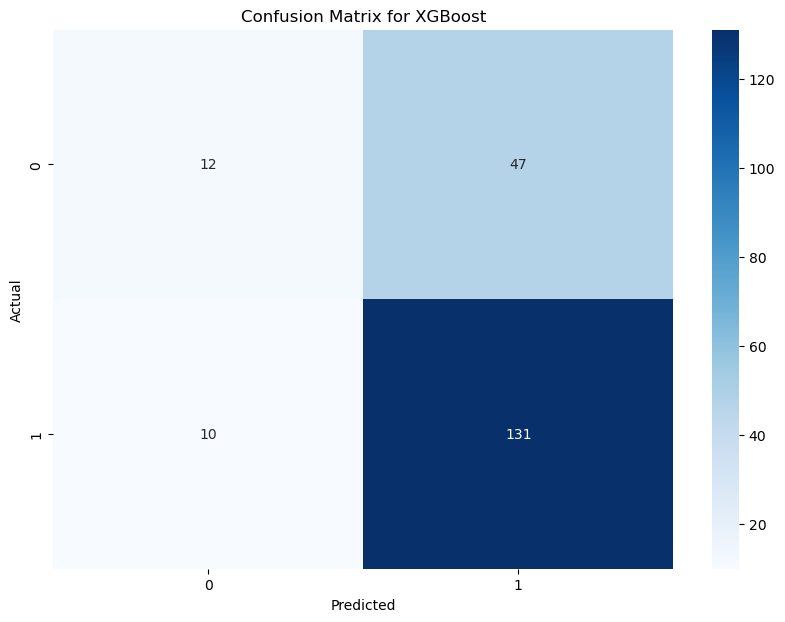


Evaluating LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 448, number of negative: 192
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 309
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.700000 -> initscore=0.847298
[LightGBM] [Info] Start training from score 0.847298
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

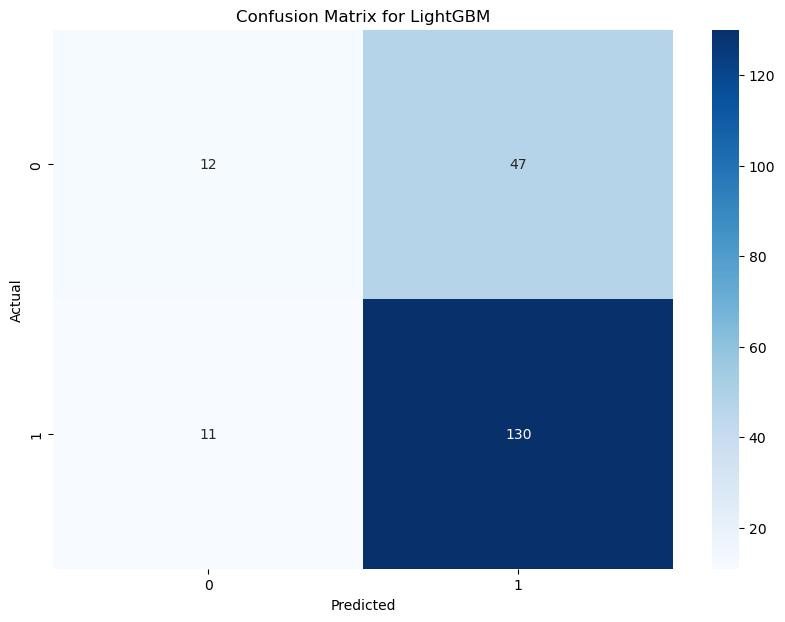

          Model  Train Accuracy  Test Accuracy
0  RandomForest         0.93625          0.710
1  DecisionTree         0.89875          0.620
2           SVM         0.69875          0.705
3       XGBoost         0.82125          0.715
4      LightGBM         0.81625          0.710


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import xgboost as xgb
import lightgbm as lgb

# Define models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'XGBoost': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    'LightGBM': lgb.LGBMClassifier(random_state=42)
}

# Hyperparameter grids
param_grids = {
    'RandomForest': {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]},
    'DecisionTree': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    'SVM': {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]},
    'XGBoost': {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.01], 'max_depth': [3, 6, 9]},
    'LightGBM': {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.01], 'num_leaves': [31, 64]}
}

# Function to perform hyperparameter tuning
def hyperparameter_tuning(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

# Function to evaluate the model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    train_acc = accuracy_score(y_train, train_predictions)
    test_acc = accuracy_score(y_test, test_predictions)
    cm = confusion_matrix(y_test, test_predictions)
    cr = classification_report(y_test, test_predictions)
    return train_acc, test_acc, cm, cr

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an empty list to store accuracy data
accuracy_data = []

# Evaluate each model
for model_name, model in models.items():
    print(f'\nEvaluating {model_name}...')
    best_model = hyperparameter_tuning(model, param_grids[model_name], X_train, y_train)
    train_acc, test_acc, cm, cr = evaluate_model(best_model, X_train, y_train, X_test, y_test)
    
    # Store results in a dictionary
    result = {
        'train_accuracy': train_acc,
        'test_accuracy': test_acc,
        'confusion_matrix': cm,
        'classification_report': cr
    }
    
    # Print results
    print(f'\nResults for {model_name}:')
    print(f"Train Accuracy: {result['train_accuracy']}")
    print(f"Test Accuracy: {result['test_accuracy']}")
    print('Confusion Matrix:')
    print(result['confusion_matrix'])
    print('Classification Report:')
    print(result['classification_report'])
    
    # Append accuracy data to the list
    accuracy_data.append({
        'Model': model_name,
        'Train Accuracy': result['train_accuracy'],
        'Test Accuracy': result['test_accuracy']
    })
    
    # Plot the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Create a dataframe for the accuracy data
accuracy_df = pd.DataFrame(accuracy_data)
print(accuracy_df)
